In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv',index_col='EmployeeNumber')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

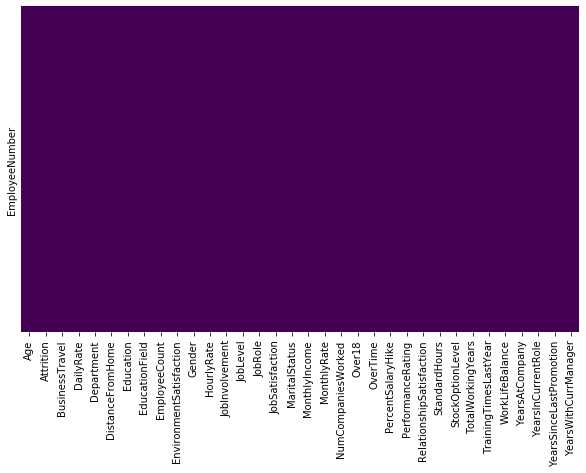

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cmap='viridis',cbar=False, yticklabels=False);

In [6]:
#no null value present as seen from above heatmap.

In [7]:
for col in df.columns:
    print("{}:{}".format(col,df[col].nunique()))
    print("=======================================")

Age:43
Attrition:2
BusinessTravel:3
DailyRate:886
Department:3
DistanceFromHome:29
Education:5
EducationField:6
EmployeeCount:1
EnvironmentSatisfaction:4
Gender:2
HourlyRate:71
JobInvolvement:4
JobLevel:5
JobRole:9
JobSatisfaction:4
MaritalStatus:3
MonthlyIncome:1349
MonthlyRate:1427
NumCompaniesWorked:10
Over18:1
OverTime:2
PercentSalaryHike:15
PerformanceRating:2
RelationshipSatisfaction:4
StandardHours:1
StockOptionLevel:4
TotalWorkingYears:40
TrainingTimesLastYear:7
WorkLifeBalance:4
YearsAtCompany:37
YearsInCurrentRole:19
YearsSinceLastPromotion:16
YearsWithCurrManager:18


In [8]:
df.drop(columns=['Over18','StandardHours','EmployeeCount'],inplace=True)

In [9]:
df['Attrition']=df['Attrition'].map({'Yes':1, 'No':0})

In [10]:
categorical_col=[]
for col in df.columns:
    if df[col].dtype== object and df[col].nunique()<=50:
        categorical_col.append(col)
print(categorical_col)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [11]:
for col in categorical_col:
    print("{}:\n{}".format(col,df[col].value_counts()))
    print("=======================================")

BusinessTravel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender:
Male      882
Female    588
Name: Gender, dtype: int64
JobRole:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus:
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
OverTime:
No     1054
Yes     416
Name: OverTime,

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

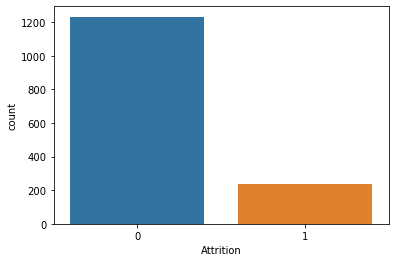

In [13]:
sns.countplot(x='Attrition',data=df)

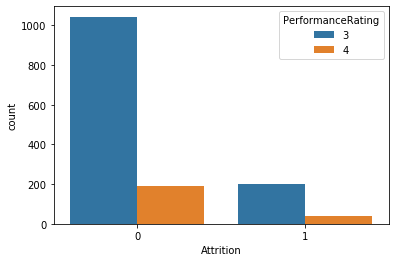

In [14]:
sns.countplot(x='Attrition',hue='PerformanceRating',data=df)

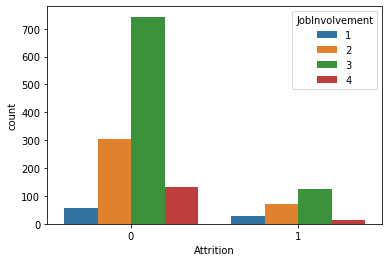

In [15]:
sns.countplot(x='Attrition',hue='JobInvolvement',data=df)

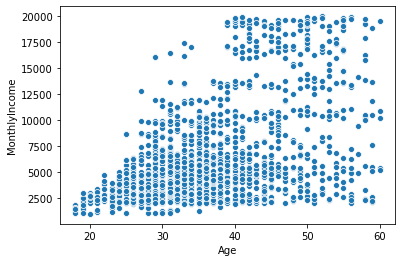

In [16]:
sns.scatterplot(x='Age',y='MonthlyIncome',data=df)

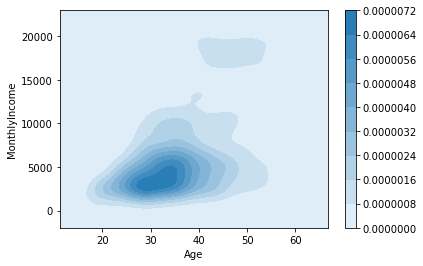

In [17]:
sns.kdeplot(df['Age'],df['MonthlyIncome'],shade=True,cbar=True)

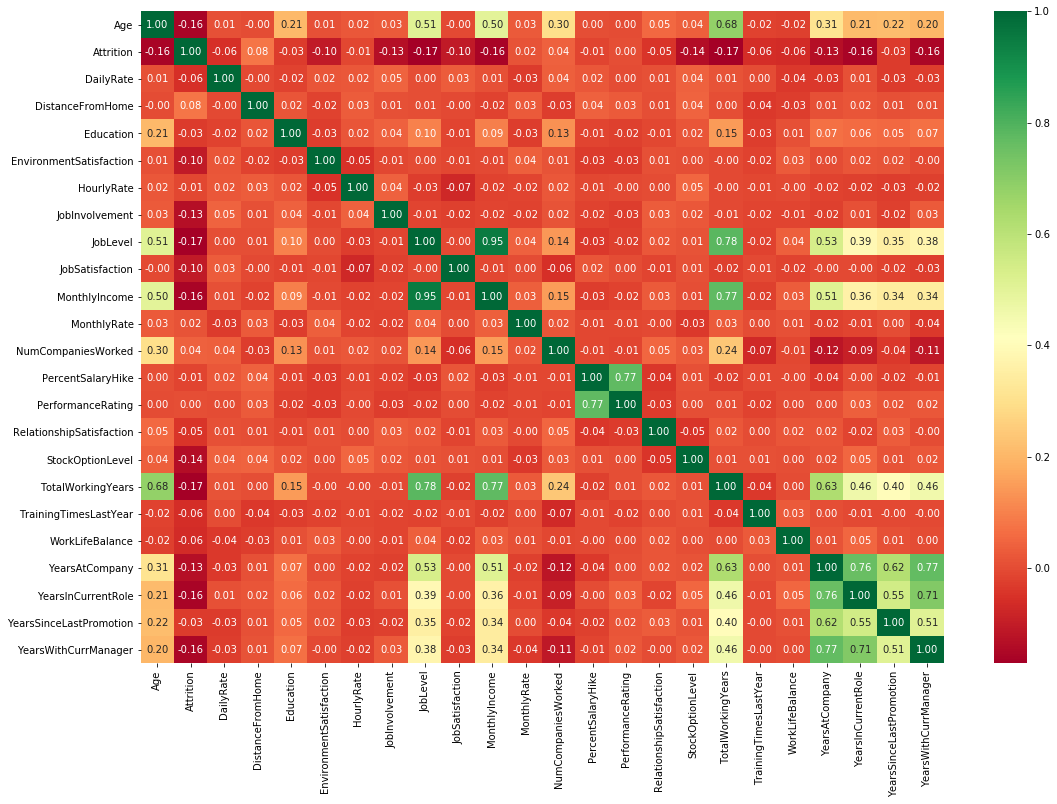

In [18]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True,fmt='.2f')

1.Self relation i.e of a feature to itself is equal to 1 as expected.

2.JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

3.PerformanceRating is highly related to PercentSalaryHike which is quite obvious.

4.MonthlyIncome is very strongly related to joblevel as expected as senior employees will definately earn more.

5.YearsAtCompany is related to YearsInCurrentRole.

6.Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

7.YearsWithCurrManager is highly related to YearsAtCompany.

In [19]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64

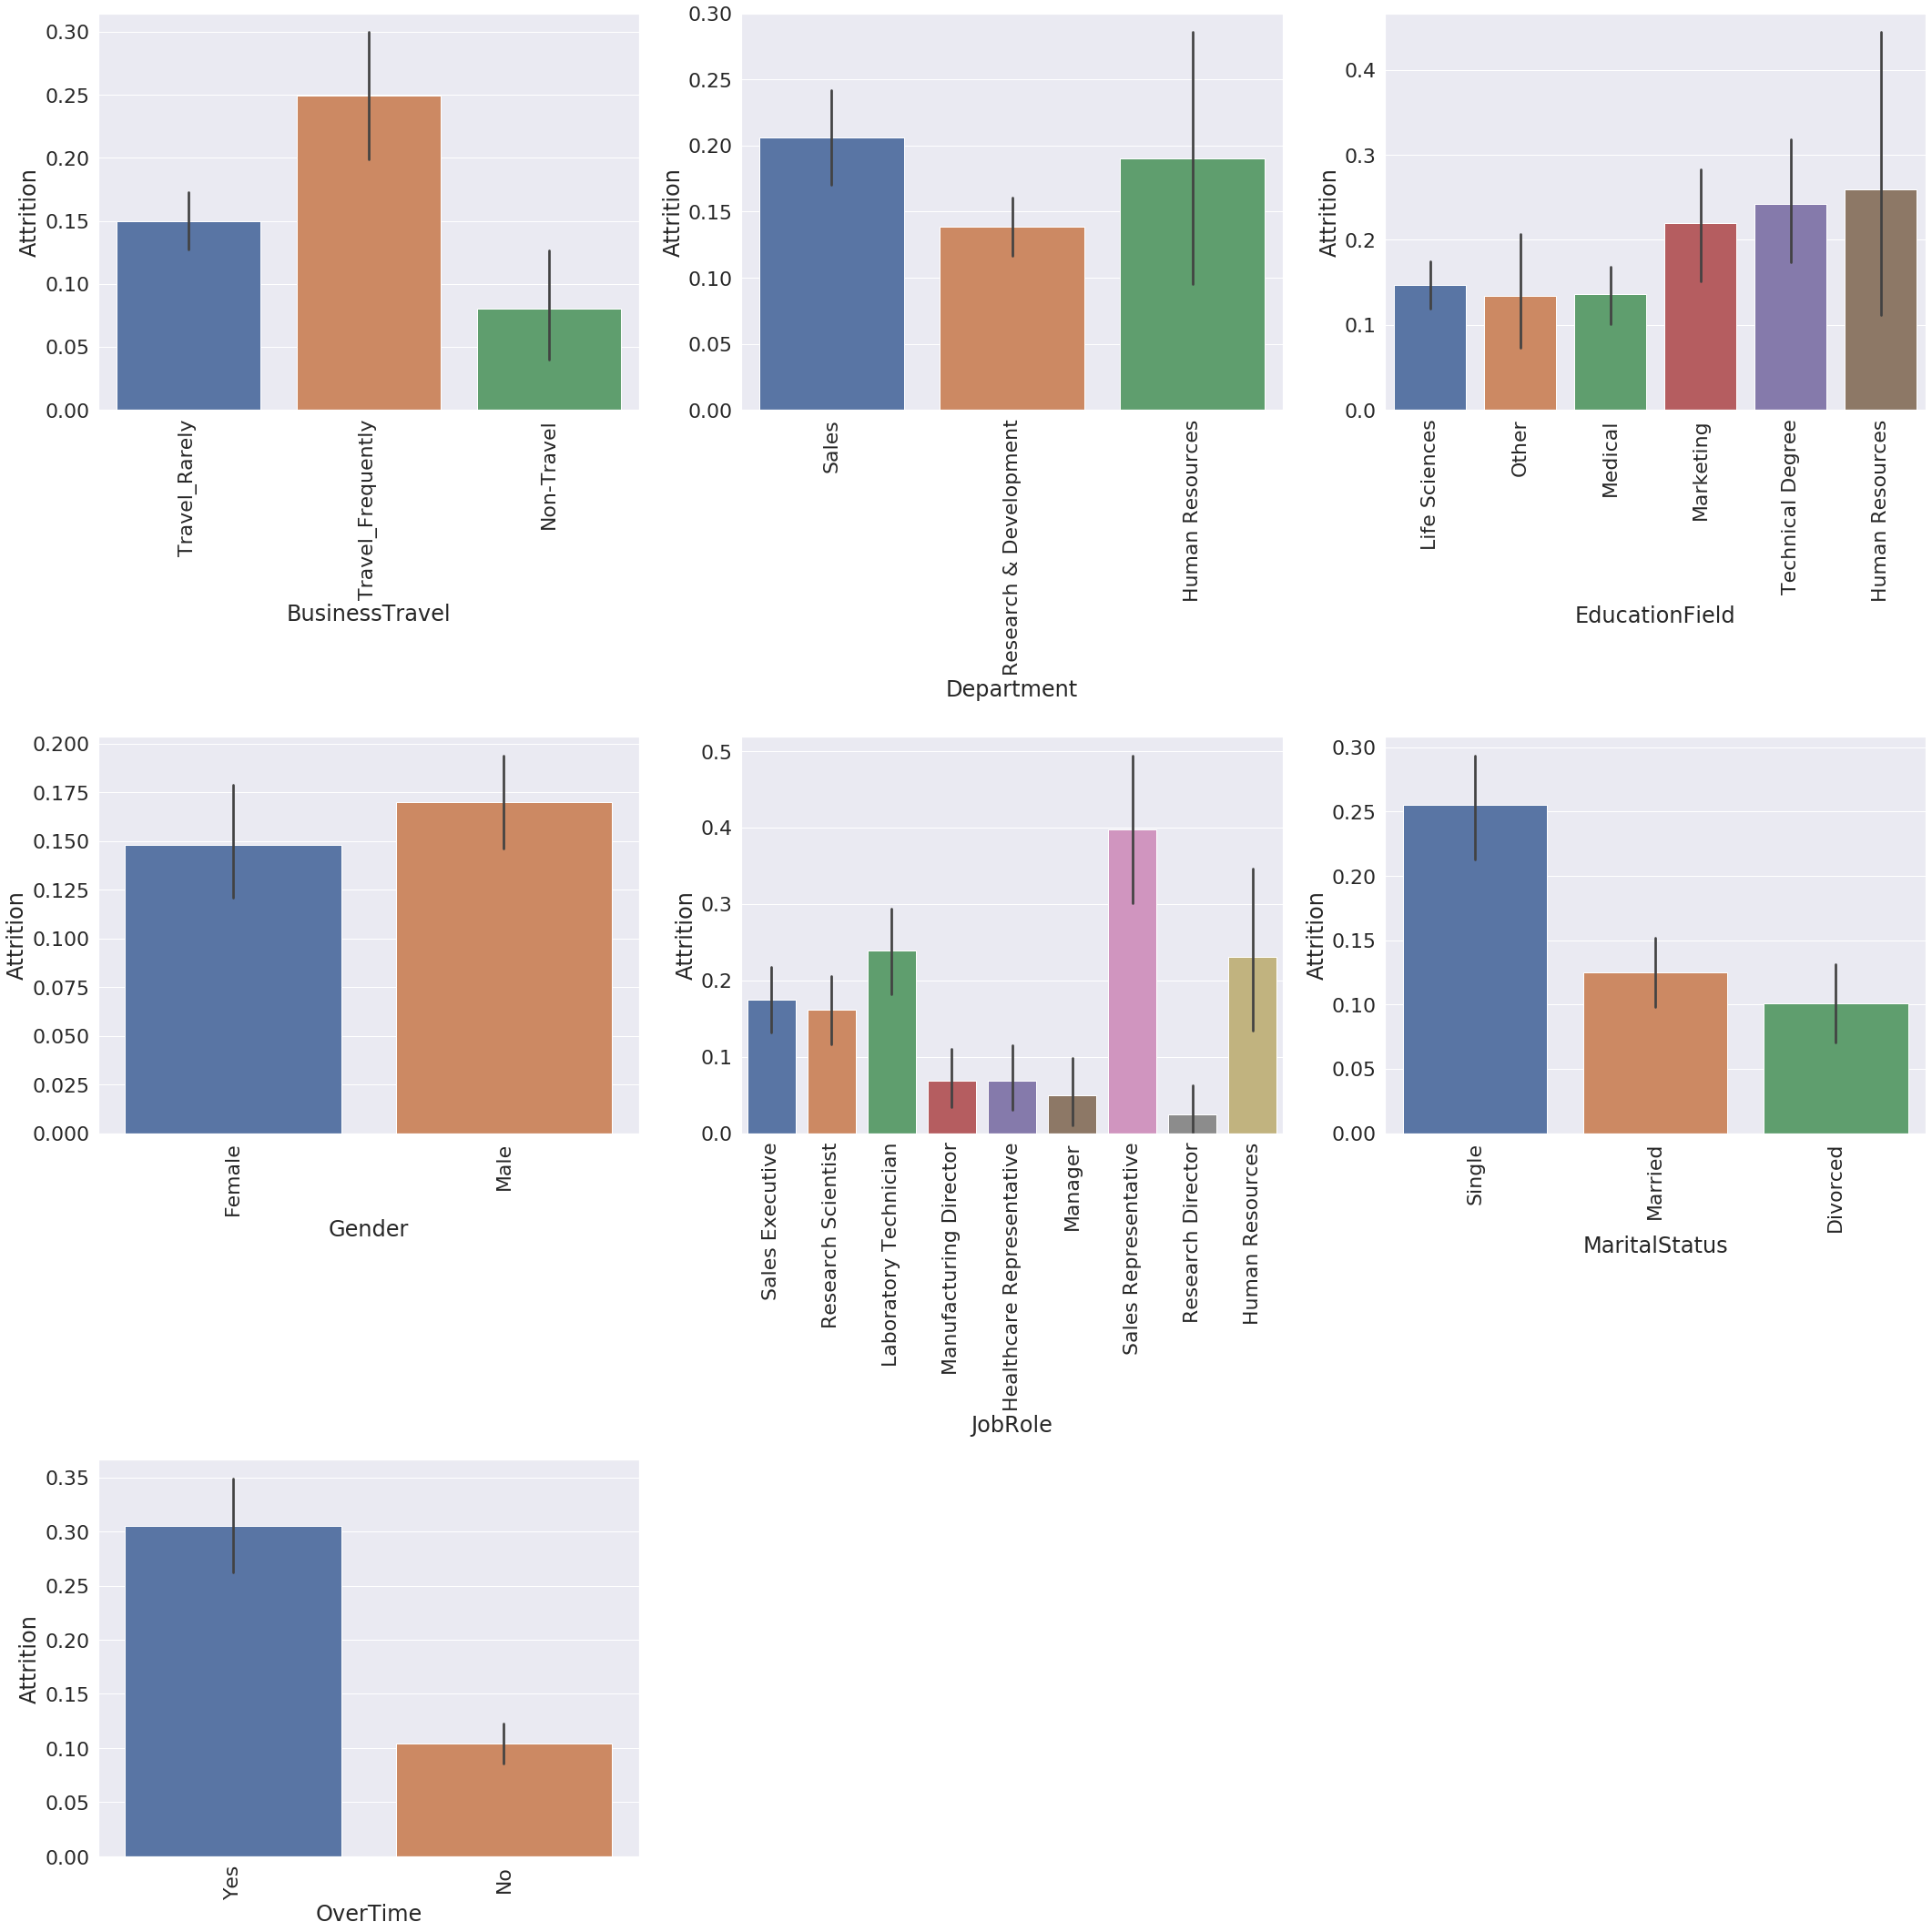

In [20]:
sns.set(font_scale=2)
plt.figure(figsize=(30,30))
for i,col in enumerate(categorical_col,1):
    plt.subplot(3,3,i)
    sns.barplot(x=f"{col}",y='Attrition',data=df)
    plt.xticks(rotation=90)
plt.tight_layout()


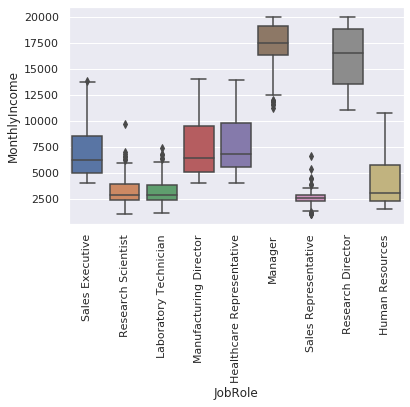

In [21]:
sns.set(font_scale=1)
sns.boxplot(x='JobRole',y='MonthlyIncome',data=df)
plt.xticks(rotation=90);

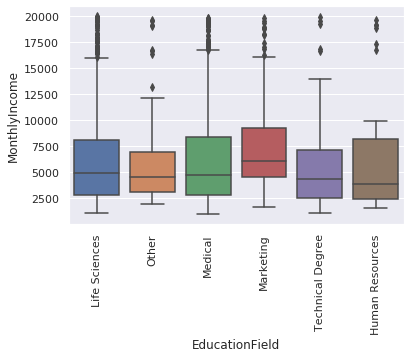

In [22]:
sns.boxplot(x='EducationField',y='MonthlyIncome',data=df)
plt.xticks(rotation=90);

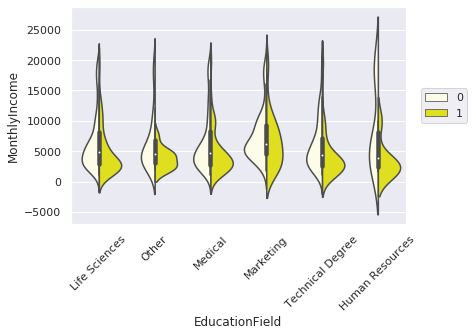

In [23]:
sns.violinplot(x='EducationField',y='MonthlyIncome',data=df,hue='Attrition',color='Yellow',split=True)
plt.legend(bbox_to_anchor=(1.2,0.65))
plt.xticks(rotation=45);

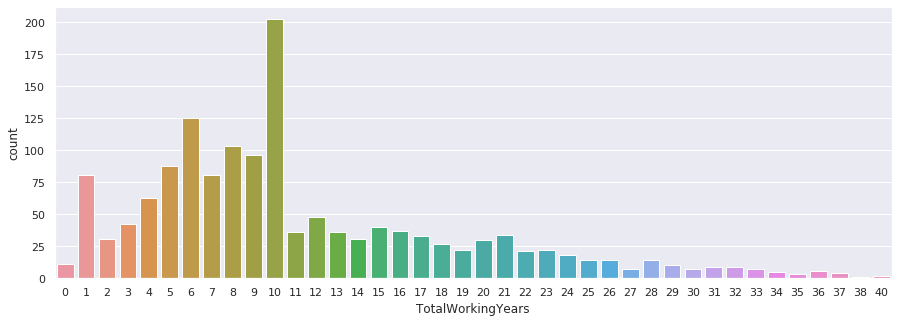

In [24]:
plt.subplots(figsize=(15,5))
sns.countplot(x='TotalWorkingYears',data=df)

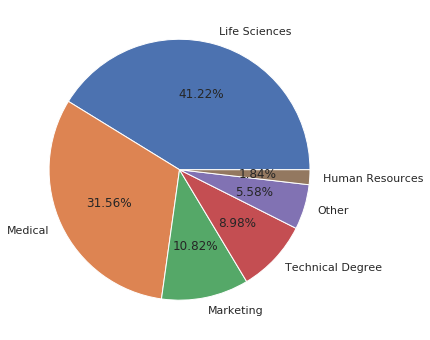

In [25]:
plt.figure(figsize=(6,6))
plt.pie(df['EducationField'].value_counts(),labels=df['EducationField'].value_counts().index,autopct='%.2f%%');

In [26]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [27]:
df.groupby(by='JobRole')["PercentSalaryHike","YearsAtCompany","TotalWorkingYears","YearsInCurrentRole","WorkLifeBalance"].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,PercentSalaryHike,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,WorkLifeBalance
JobRole,,,,,
Healthcare Representative,15.450382,8.374046,14.068702,4.862595,2.702290
Human Resources,14.807692,5.326923,8.173077,3.134615,2.923077
Laboratory Technician,15.046332,5.019305,7.656371,3.200772,2.718147
Manager,15.137255,14.431373,24.549020,6.450980,2.774510
Manufacturing Director,15.593103,7.600000,12.786207,4.972414,2.765517
Research Director,14.950000,10.937500,21.400000,6.287500,2.862500
Research Scientist,15.448630,5.113014,7.715753,3.273973,2.678082
Sales Executive,14.889571,7.496933,11.101227,4.855828,2.803681
Sales Representative,15.674699,2.915663,4.674699,2.012048,2.891566


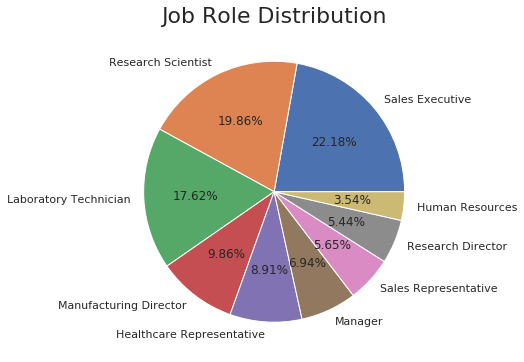

In [28]:
plt.figure(figsize=(6,6))
plt.pie(df['JobRole'].value_counts(),labels=df['JobRole'].value_counts().index,autopct='%.2f%%');
plt.title('Job Role Distribution',fontdict={'fontsize':22});

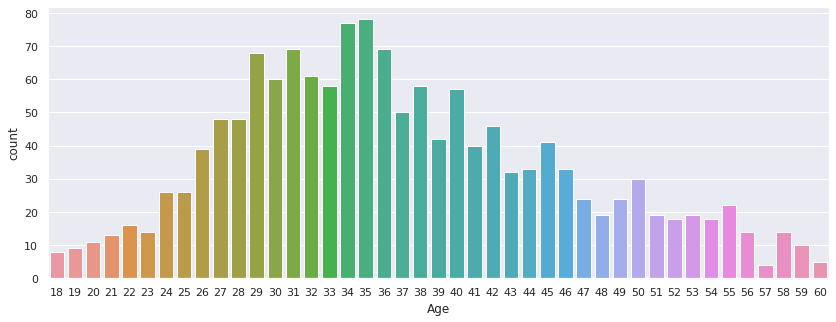

In [29]:
plt.figure(figsize=(14,5))
sns.countplot(x='Age',data=df)

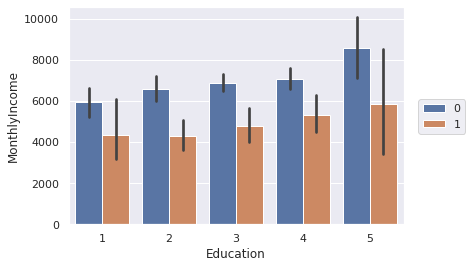

In [30]:
sns.barplot(x='Education',y='MonthlyIncome',hue='Attrition',data=df)
plt.legend(bbox_to_anchor=(1.2,0.6))

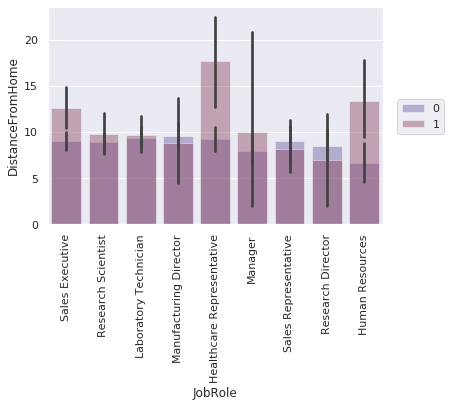

In [31]:
sns.barplot(y='DistanceFromHome',x='JobRole',hue='Attrition',data=df,dodge=False,alpha=0.4,palette='twilight')
plt.xticks(rotation=90);
plt.legend(bbox_to_anchor=(1.2,0.6));

ENCODING THE CATEGORICAL COLUMNS.

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le= LabelEncoder()

In [34]:
for col in categorical_col:
    df[col]=le.fit_transform(df[col])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
data= df.copy()

In [37]:
X= data.drop('Attrition',axis=1)
y=data['Attrition']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

USING TREE DECISION METHOD FOR PREDICTION.

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model= DecisionTreeClassifier()

In [41]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
pred= model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       378
           1       0.30      0.41      0.35        63

    accuracy                           0.78       441
   macro avg       0.60      0.63      0.61       441
weighted avg       0.81      0.78      0.79       441



ACCURACY USING DECISION TREE IS 76%. AND THE CONFUSION MATRIX COMES OUT TO BE.

In [45]:
print(confusion_matrix(y_test,pred))

[[318  60]
 [ 37  26]]


NOW, WE WILL BE TUNING THE HYPERPARAMETERS OF DECISION TREE USING RANDOMIZED SEARCH CROSS VALIDATION
METHOD FOR IMPROVING THE ACCURACY OF THE MODEL.

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
params={"criterion":("gini", "entropy"),
        "splitter":("best", "random"), 
        "max_depth":(list(range(1, 20))), 
        "min_samples_split":[2, 3, 4], 
        "min_samples_leaf":list(range(1, 20))}

In [48]:
tree_random= RandomizedSearchCV(model,params,n_iter=100,n_jobs=-1,cv=3,verbose=2)

In [49]:
tree_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [50]:
tree_random.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [52]:
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       378
           1       0.47      0.30      0.37        63

    accuracy                           0.85       441
   macro avg       0.68      0.62      0.64       441
weighted avg       0.83      0.85      0.84       441



WE CAN SEE THAT WE HAVE IMPROVED THE ACCURACY FOR DECISION TREE TO 83% USING RANDOM SEARCH CV METHOD. AND THE CONFUSION MATRIX IS FOUND TO BE.

In [54]:
print(confusion_matrix(y_test,pred))

[[357  21]
 [ 44  19]]


NOW TRYING TO MAKE A MODEL USING RANDOM FOREST CLASSIFIER

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc= RandomForestClassifier(n_estimators=100)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
rfc_pred= rfc.predict(X_test)

In [59]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       378
           1       0.80      0.13      0.22        63

    accuracy                           0.87       441
   macro avg       0.84      0.56      0.57       441
weighted avg       0.86      0.87      0.83       441



In [60]:
print(confusion_matrix(y_test,rfc_pred))

[[376   2]
 [ 55   8]]


Accuracy of this model is 85%.